In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_regression, r_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [78]:
Datos=pd.read_csv("../Life-Expectancy-Data-Updated.csv")

In [79]:
Datos

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0       Turkiye     Middle East  2015           11.1               13.0   
1         Spain  European Union  2015            2.7                3.3   
2         India            Asia  2007           51.5               67.9   
3        Guyana   South America  2006           32.8               40.5   
4        Israel     Middle East  2012            3.4                4.3   
...         ...             ...   ...            ...                ...   
2859      Niger          Africa  2000           97.0              224.9   
2860   Mongolia            Asia  2009           23.9               28.6   
2861  Sri Lanka            Asia  2004           17.7               28.9   
2862  Lithuania  European Union  2002            7.9                9.9   
2863    Iceland  Rest of Europe  2011            2.1                2.6   

      Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0            105.8240                1.320           97       65  27.8  ...   
1             57.9025               10.350           97       94  26.0  ...   
2            201.0765                1.570           60       35  21.2  ...   
3            222.1965                5.680           93       74  25.3  ...   
4             57.9510                2.890           97       89  27.0  ...   
...               ...                  ...          ...      ...   ...  ...   
2859         291.8240                0.092           72       64  20.8  ...   
2860         235.2330                6.560           97       97  25.3  ...   
2861         134.8950                1.560           62       95  21.9  ...   
2862         204.0120               11.000           94       95  26.1  ...   
2863          50.5745                6.840           88       90  26.1  ...   

      Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0             97           0.08           11006           78.53   
1             97           0.09           25742           46.44   
2             64           0.13            1076         1183.21   
3             93           0.79            4146            0.75   
4             94           0.08           33995            7.91   
...          ...            ...             ...             ...   
2859          34           0.49             399           11.33   
2860          95           0.02            2515            2.67   
2861          97           0.02            2130           19.39   
2862          95           0.05            7424            3.44   
2863          95           0.05           48934            0.32   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                             4.9                       4.8        7.8   
1                             0.6                       0.5        9.7   
2                            27.1                      28.0        5.0   
3                             5.7                       5.5        7.9   
4                             1.2                       1.1       12.8   
...                           ...                       ...        ...   
2859                         12.8                      12.9        1.1   
2860                          2.2                       2.3        9.1   
2861                         15.4                      15.5       10.3   
2862                          3.3                       3.3       11.1   
2863                          0.9                       0.9       11.0   

      Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                            0                          1             76.5  
1                            1                          0             82.8  
2                            0                          1             65.4  
3                            0                          1             67.0  
4                            1                          0             81.7  
..

### Exclusion de variables

Dado que el analisis que se tiene pensado hacer es un analisis de series de tiempo multivariado para propositos de estudiar el impacto de las variables no se tomaran en cuenta 3 variables en especifico:

1: Country
2: Region
3: Year
4: Economy_status_Developed
5: Economy_status_Developing

Primeramente el año no constituye a una variable de la cual podamos deshacernos debido a que se hara un estudio de series de tiempo, debido a esto se omitira completamente de esta parte de seleccion de variables dado que podria considerarse es valida "por defecto".
En contraste las otras 4 variables constituyen a variables categoricas, las cual probablemente en un futuro reporte se usaran para analizar los resultados obtenidos pero al menos en primera instancia no cumplen con una funcion que pueda considerarse util para propositos de nuestro analisis de series de tiempo por lo cual se omitiran de este paso.

Cabe destacar que para las 5 variables seran excluidas unicamente de esta parte del estudio (i.e la seleccion de variables ) sin embargo en futuros analisis las variables no seran omitidas a menos que se de una justificacion especifica para no usarlas.

### Evaluacion de variables no omitadas

Empezaremos omitiendo del conjunto de datos las variables previamente mencionadas

In [80]:
Datos_mod=Datos.drop(columns=["Country","Region","Year","Economy_status_Developed","Economy_status_Developing"])

In [81]:
features = [col for col in Datos_mod.columns if col not in ['Life_expectancy']] 
y = Datos_mod['Life_expectancy']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('selector', SelectKBest(score_func=f_regression, k=10))
])
X = Datos_mod.drop(columns=['Life_expectancy'])
pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Infant_deaths',
                                                   'Under_five_deaths',
                                                   'Adult_mortality',
                                                   'Alcohol_consumption',
                                                   'Hepatitis_B', 'Measles',
                                                   'BMI', 'Polio', 'Diphtheria',
                                                   'Incidents_HIV',
                                                   'GDP_per_capita',
                                                   'Population_mln',
                                                   'Thinness_ten_nineteen_years',
                                                   'Thinness_five_nine_years',
                                                   'Schooling'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector',
                 SelectKBest(score_func=<function f_regression at 0x0000022BD5378040>))])

C:\Users\Victor Alanis\AppData\Local\Temp\ipykernel_59128\1554658445.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=selected_features_scores, palette='viridis')


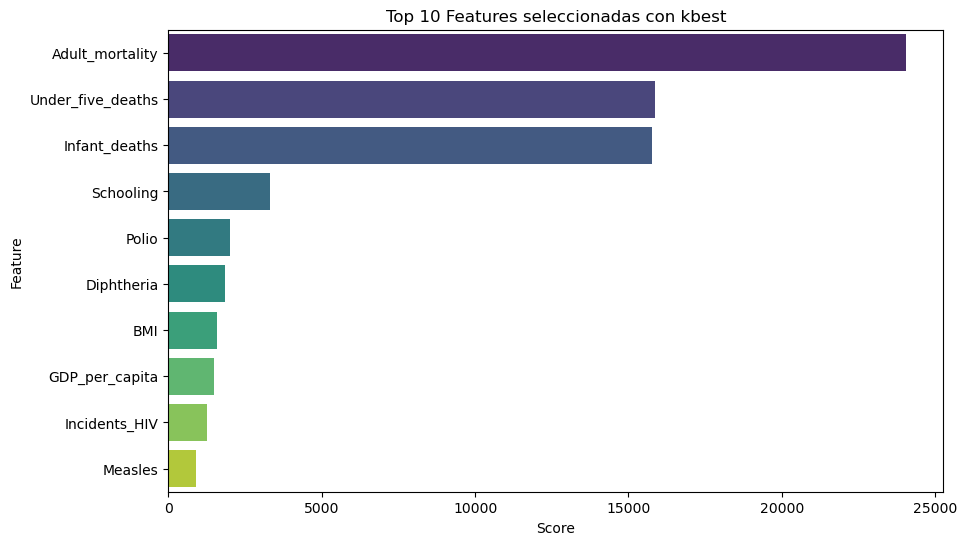

In [82]:
selected_columns_indices = pipeline.named_steps['selector'].get_support(indices=True)
selected_scores = pipeline.named_steps['selector'].scores_[selected_columns_indices]

transformed_columns = np.hstack([
    features
])

selected_features = transformed_columns[selected_columns_indices]
selected_features_scores = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})

selected_features_scores = selected_features_scores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=selected_features_scores, palette='viridis')
plt.title('Top 10 Features seleccionadas con kbest')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

Se puede apreciar como La mortalidad adulta es precisamente uno de los mejores indicadores/más correlacionado con respecto a la expectativa de vida, lo cual tiene sentido, sin embargo vamos a continuar con más pruebas para confirmar que variables pueden ser relevantes.

In [83]:
features = [col for col in Datos_mod.columns if col not in ['Life_expectancy']] 
y = Datos_mod['Life_expectancy']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), features)  
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_processed = pipeline.fit_transform(Datos_mod)

y = Datos_mod['Life_expectancy']


F, p_values = f_regression(X_processed, y)

results_df = pd.DataFrame({
    'Feature': np.array(features),
    'F-value': F,
    'p-value': p_values
})

results_df = results_df.sort_values(by='p-value')

results_df

Feature       F-value        p-value
0                 Infant_deaths  15777.939947   0.000000e+00
1             Under_five_deaths  15864.859075   0.000000e+00
2               Adult_mortality  24063.375645   0.000000e+00
7                         Polio   1998.402061   0.000000e+00
14                    Schooling   3313.203564   0.000000e+00
8                    Diphtheria   1859.277978  1.952921e-313
6                           BMI   1596.711182  7.446629e-278
10               GDP_per_capita   1474.321741  1.516751e-260
9                 Incidents_HIV   1260.965065  3.628279e-229
5                       Measles    904.375333  6.767819e-173
12  Thinness_ten_nineteen_years    801.874739  9.957740e-156
13     Thinness_five_nine_years    760.400982  1.208344e-148
4                   Hepatitis_B    605.243996  2.130279e-121
3           Alcohol_consumption    542.419294  5.155488e-110
11               Population_mln      1.980667   1.594287e-01

Bajo la misma linea podemos apreciar como otro indicativo importante para determinar la expectativa de vida (la cual hasta cierto punto es un indicativo de la salud generla de un pais) es precisamente la mortalidad tanto en adultos como en infantes.

Algo que encuentro relevante es el hecho de que todos los p-valores que se obtuvieron son significativamente bajos, con excepcion de la poblacion, eto podria ser un buen indicativo de que la poblacion tal vez no sea la mejor variable a estudiar para este analisis dado a su gran variacion entre paises.


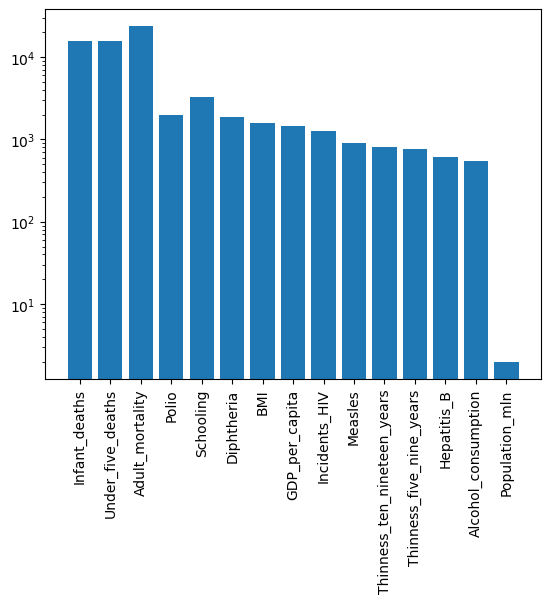

In [84]:
plt.figure()
plt.bar(results_df['Feature'], results_df['F-value'])
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()


In [85]:
r_value = r_regression(X, y)

In [86]:
results_df['r_value'] = r_value
colors = []
for v in results_df['r_value']:
    if v > 0:
        colors.append('b')
    else:
        colors.append('r')

In [87]:
results_df.reset_index(inplace=True)
results_df.drop(columns="index")

Feature       F-value        p-value   r_value
0                 Infant_deaths  15777.939947   0.000000e+00 -0.920032
1             Under_five_deaths  15864.859075   0.000000e+00 -0.920419
2               Adult_mortality  24063.375645   0.000000e+00 -0.945360
3                         Polio   1998.402061   0.000000e+00  0.399159
4                     Schooling   3313.203564   0.000000e+00  0.417804
5                    Diphtheria   1859.277978  1.952921e-313  0.490019
6                           BMI   1596.711182  7.446629e-278  0.598423
7                GDP_per_capita   1474.321741  1.516751e-260  0.641217
8                 Incidents_HIV   1260.965065  3.628279e-229  0.627541
9                       Measles    904.375333  6.767819e-173 -0.553027
10  Thinness_ten_nineteen_years    801.874739  9.957740e-156  0.583090
11     Thinness_five_nine_years    760.400982  1.208344e-148  0.026298
12                  Hepatitis_B    605.243996  2.130279e-121 -0.467824
13          Alcohol_consumption    542.419294  5.155488e-110 -0.458166
14               Population_mln      1.980667   1.594287e-01  0.732484

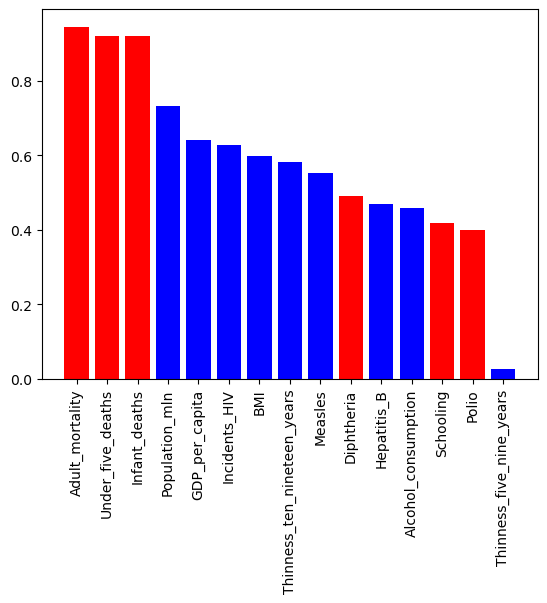

In [88]:
results_df['r_value_abs'] = results_df['r_value'].abs()
results_df.sort_values('r_value_abs', inplace = True, ascending = False)
plt.figure()
plt.bar(results_df.Feature, results_df.r_value_abs, color = colors)
plt.xticks(rotation=90)
plt.show()

Otra variable que se podria considerar eliminar es Thinness_five_nine_years dado que muy probablemente esta altamente correlacionada con la mortalidad en menores de 5 años

In [89]:
from sklearn.feature_selection import mutual_info_regression

In [90]:
mi = mutual_info_regression(X, y)
mi

array([1.20793683, 1.2334786 , 1.44885857, 0.41535339, 0.34341469,
       0.50061667, 0.65138073, 0.35180121, 0.36712812, 0.5237807 ,
       0.84587477, 0.2839608 , 0.82665785, 0.81120231, 0.7003835 ])

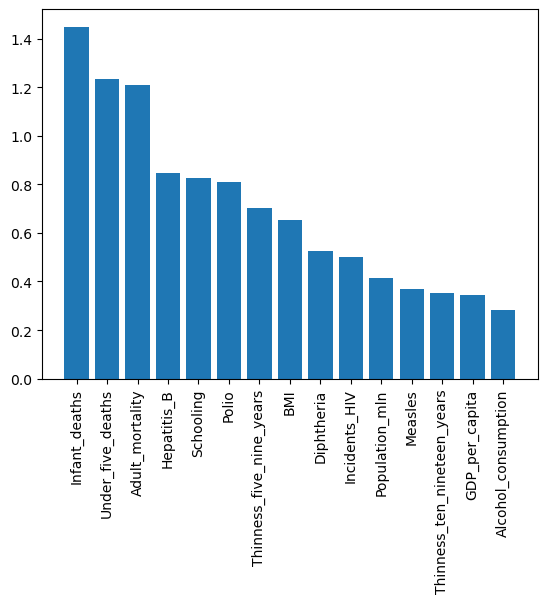

In [91]:
results_df['mi'] = mi
results_df.sort_values('mi', ascending = False, inplace = True)

plt.figure()
plt.bar(results_df.Feature, results_df.mi)
plt.xticks(rotation=90)
plt.show()

In [95]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS



Ahora vamos a aplicar un efs utlizando un regresor lineal

In [96]:
lr = LinearRegression()

efs = EFS(estimator = lr,        
          min_features = 1,      
          max_features = 10,      
          scoring = 'neg_mean_absolute_error',  
          cv = 5)

In [97]:
efs = efs.fit(X, y)


c:\Users\Victor Alanis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Victor Alanis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Victor Alanis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Victor Alanis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Victor Alanis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73

In [98]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
pca = PCA(n_components = 17)
pca_model = pca.fit(x_scaled)